# This notebook is for Univariate and Bivariate data analysis
### We will explore the distribution of individual variables (univariate analysis)
### and the relationships between pairs of variables (bivariate analysis).

In [54]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, model_selection, metrics
import scipy as sp
from scipy import stats

from functions_natalia import *

# Print a confirmation message
print("Libraries imported successfully!")

Libraries imported successfully!


# Load datasets

In [2]:
df_demo = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_demo.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3


In [3]:
df_experiment = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_experiment.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [4]:
df_web = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


## Univariate analysis
## Question: Are the primary clients younger or older?

In [5]:
age_frequency_table = df_demo['age'].value_counts()
age_frequency_table

age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
95.5      1
94.5      1
13.5      1
Name: count, Length: 166, dtype: int64

In [6]:
#top 5 age 
top_five_age = age_frequency_table.head()
top_five_age

age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
Name: count, dtype: int64

# Display the distribution of age using a bar chart. (SEABORN)

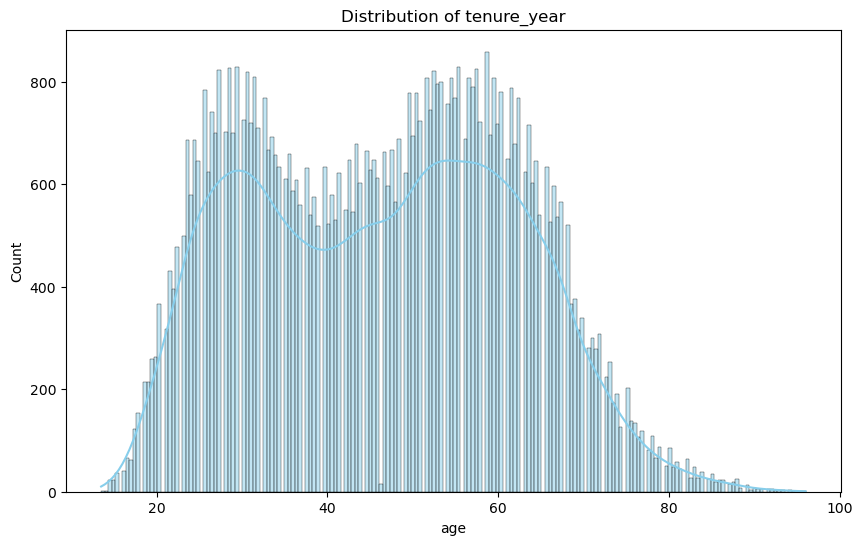

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo[df_demo['age']<100]["age"], bins=200, kde=True, color="skyblue")
plt.title('Distribution of tenure_year')
plt.show()

# Are the primary clients  new or long-standing?

In [9]:
tenure_frequency_table = df_demo['tenure_year'].value_counts()
tenure_frequency_table

tenure_year
6.00000     7092
5.00000     6955
7.00000     4955
4.00000     4687
15.00000    4564
8.00000     4045
14.00000    3646
12.00000    3631
13.00000    3607
9.00000     3357
11.00000    2920
10.00000    2775
16.00000    2714
21.00000    2257
20.00000    1580
22.00000    1492
17.00000    1373
23.00000    1279
18.00000    1206
19.00000    1153
24.00000     846
26.00000     660
27.00000     632
28.00000     507
25.00000     484
3.00000      449
29.00000     309
30.00000     303
33.00000     206
32.00000     191
34.00000     175
31.00000     166
35.00000     102
2.00000       81
36.00000      36
37.00000      35
38.00000      33
48.00000      16
12.05295      14
39.00000       9
40.00000       9
55.00000       9
50.00000       8
42.00000       6
47.00000       6
43.00000       6
46.00000       5
51.00000       5
49.00000       4
44.00000       3
52.00000       2
54.00000       1
41.00000       1
45.00000       1
62.00000       1
Name: count, dtype: int64

## Distribution of tenure_year

In [10]:
top_five_tenure = tenure_frequency_table.head()
top_five_tenure 

tenure_year
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
Name: count, dtype: int64

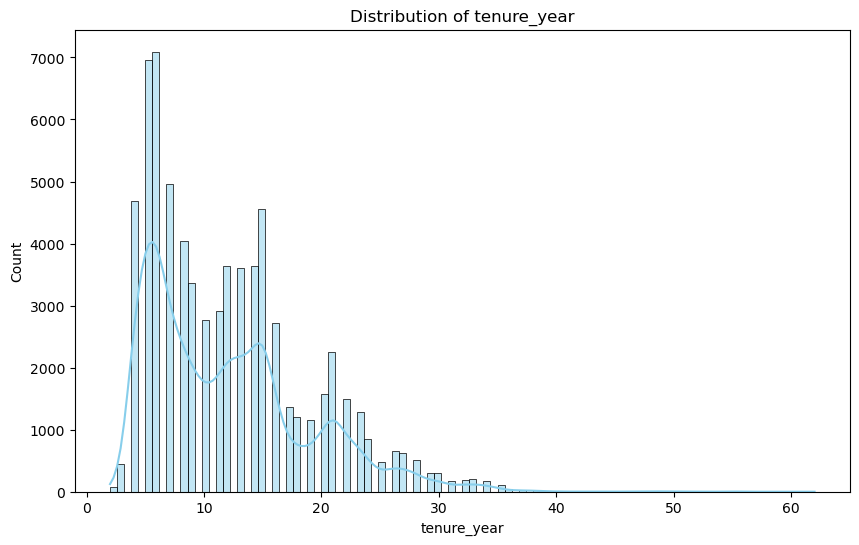

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo['tenure_year'], bins=100, kde=True, color="skyblue")
plt.title('Distribution of tenure_year')
plt.show()

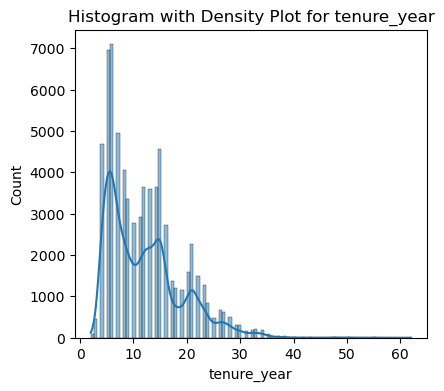

In [66]:
#Histogram for visual inspection of distribution and outliers
def histogram_with_density_plot(df, column):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.histplot(df[column],bins=100, kde=True)  # Use the 'column' parameter to reference the DataFrame column
    plt.title(f'Histogram with Density Plot for {column}')
    plt.show()

# usage:
histogram_with_density_plot(df_demo, 'tenure_year')

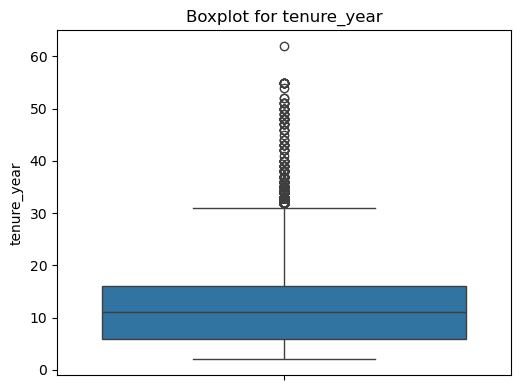

In [68]:
#Boxplot to visually check for outliers
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 4))  # Setting the figure size for better visibility
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot for {column}')

    plt.tight_layout()  # Adjusts plot parameters for better layout
    plt.show()

# Example usage:
plot_boxplot(df_demo, 'tenure_year')

In [69]:
#Shapiro-Wilk test for normality
def shapiro_wilk_test(df, column):
    # Extract the column data
    data = df[column]
    
    # Perform the Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    
    # Display the results
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print("The data appears to be normally distributed (fail to reject H0).")
    else:
        print("The data does not appear to be normally distributed (reject H0).")

# usage:
shapiro_wilk_test(df_demo, 'tenure_year')

Shapiro-Wilk Test for tenure_year: Statistics=0.912, p=0.000
The data does not appear to be normally distributed (reject H0).


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70609.
  res = hypotest_fun_out(*samples, **kwds)


## Removing outliers from 'tenure_year'

### 1. Standard Deviation Method.


In [81]:
###  1.Remove outliers with Standard Deviation Method.
def remove_outliers_std(df, column, num_std=3):
    # Calculate the mean and standard deviation
    mean = df[column].mean()
    std_dev = df[column].std()

    # Define outliers as those beyond num_std standard deviations from the mean
    lower_bound = mean - (num_std * std_dev)
    upper_bound = mean + (num_std * std_dev)

    # Filter out outliers
    df_filtered = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    return df_filtered

# Example usage:
df_demo_tenure_clean_std = remove_outliers_std(df_demo, 'tenure_year')


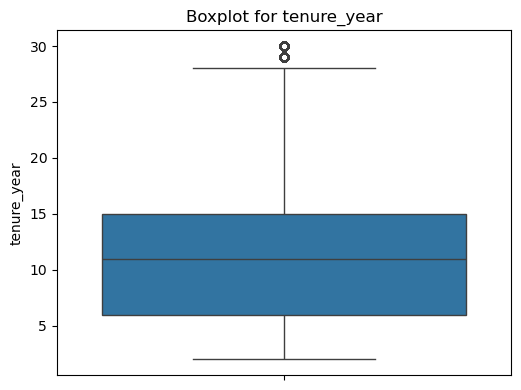

In [73]:
# Example usage:
plot_boxplot(df_demo_tenure_clean_std, 'tenure_year')

### 2. Interquartile Range (IQR) Method

In [75]:
###  2.Remove outliers with Interquartile Range (IQR) Method
def remove_outliers_iqr(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    return df_filtered

# usage:
df_demo_tenure_clean = remove_outliers_iqr(df_demo, 'tenure_year')

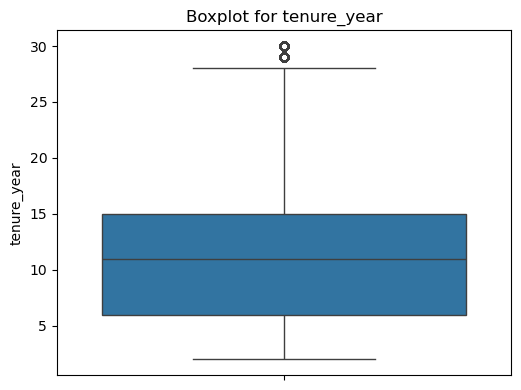

In [76]:
#  usage:
plot_boxplot(df_demo_tenure_clean, 'tenure_year')

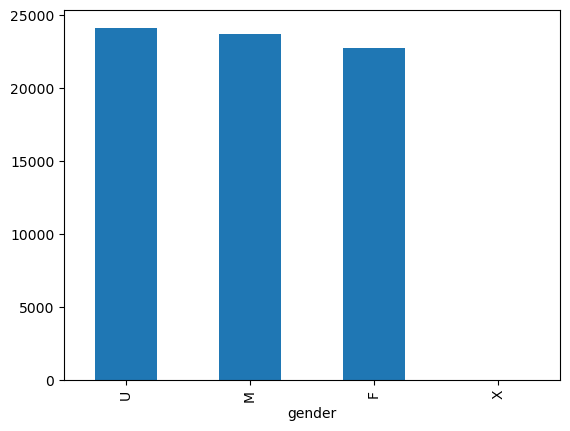

In [52]:
# Gander. Pie chart for visualize proportions for a subset of top categories
gender_frequency_table = df_demo['gender'].value_counts().plot.bar()

In [21]:
number_of_accounts_frequency_table = df_demo['number_of_accounts'].value_counts()
number_of_accounts_frequency_table

number_of_accounts
2    55511
3    12529
4     2241
5      284
6       33
7        8
1        2
8        1
Name: count, dtype: int64

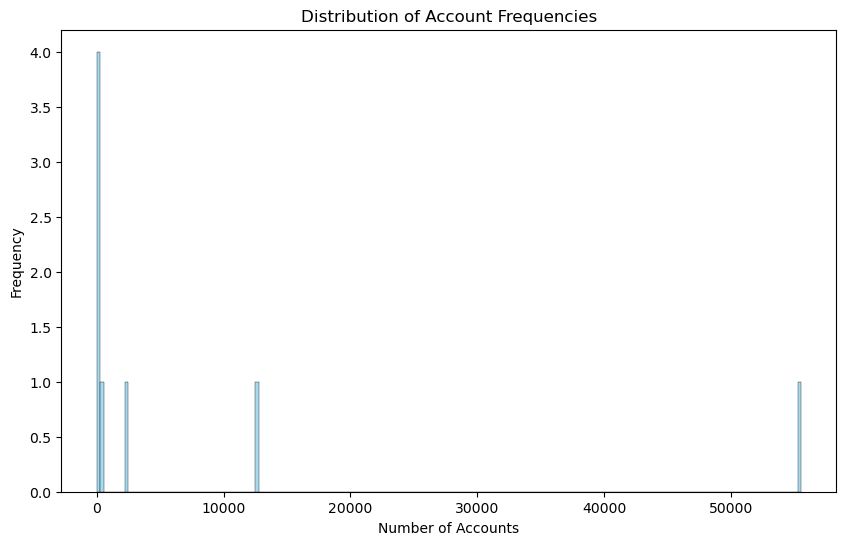

In [53]:

def plot_account_distribution(data, bins=20, kde=False, color="skyblue"):

    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=200, kde=kde, color=color)
    plt.title('Distribution of Account Frequencies')
    plt.xlabel('Number of Accounts')
    plt.ylabel('Frequency')
    plt.show()

plot_account_distribution(number_of_accounts_frequency_table)

## balance

In [27]:
#balance. Numerical. Central Tendency: Mean, median, mode (Provides the average value of a data set.) 
# 1.2. Central Tendency: Calculating the mean, median, and mode 
def calculate_central_tendency(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, so take the first element

    # Displaying the results
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)


calculate_central_tendency(df_demo, 'balance')

Mean: 147445.2406414052
Median: 63345.55
Mode: 147445.2406414052


In [30]:
# 2.2. Measures of Dispersion 
def calculate_measures_of_dispersion(df, column):
    variance = df[column].var()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Displaying the results
    print(f"Variance of {column}:", variance)
    print(f"Standard Deviation of {column}:", std_dev)
    print(f"Minimum {column}:", min_val)
    print(f"Maximum {column}:", max_val)
    print(f"1st Quartile (Q1) of {column}:", q1)
    print(f"3rd Quartile (Q3) of {column}:", q3)
    print(f"Interquartile Range (IQR) of {column}:", iqr)

# usage:
calculate_measures_of_dispersion(df_demo, 'balance')

Variance of balance: 90889475173.39915
Standard Deviation of balance: 301478.8138052144
Minimum balance: 13789.419999999998
Maximum balance: 16320040.15
1st Quartile (Q1) of balance: 37350.12
3rd Quartile (Q3) of balance: 137635.52000000002
Interquartile Range (IQR) of balance: 100285.40000000002


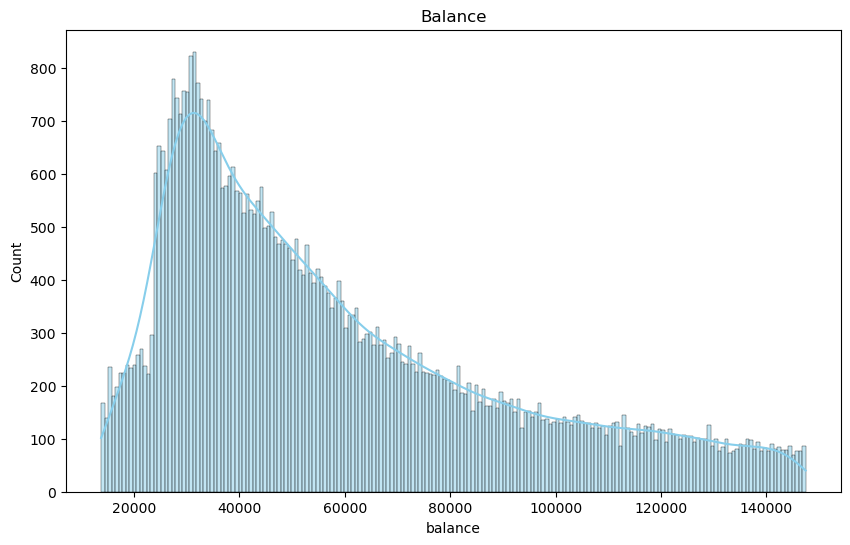

In [46]:
#2.3. Shape of Distribution Numerical  Continuous Variables

plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo[df_demo['balance']<147445]["balance"], bins=200, kde=True, color="skyblue")
plt.title('Balance')
plt.show()

## calls_6_month

In [28]:
#calls_6_month. Numerical.
# 2.1. Central Tendency: Calculating the mean, median, and mode
def calculate_central_tendency(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, so take the first element

    # Displaying the results
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    
calculate_central_tendency(df_demo, 'calls_6_month')

Mean: 3.382401676840063
Median: 3.0
Mode: 6


In [31]:
# 2.2. Measures of Dispersion 
def calculate_measures_of_dispersion(df, column):
    variance = df[column].var()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Displaying the results
    print(f"Variance of {column}:", variance)
    print(f"Standard Deviation of {column}:", std_dev)
    print(f"Minimum {column}:", min_val)
    print(f"Maximum {column}:", max_val)
    print(f"1st Quartile (Q1) of {column}:", q1)
    print(f"3rd Quartile (Q3) of {column}:", q3)
    print(f"Interquartile Range (IQR) of {column}:", iqr)

# usage:
calculate_measures_of_dispersion(df_demo, 'calls_6_month')

Variance of calls_6_month: 5.00132806939264
Standard Deviation of calls_6_month: 2.236364923126957
Minimum calls_6_month: 0
Maximum calls_6_month: 7
1st Quartile (Q1) of calls_6_month: 1.0
3rd Quartile (Q3) of calls_6_month: 6.0
Interquartile Range (IQR) of calls_6_month: 5.0


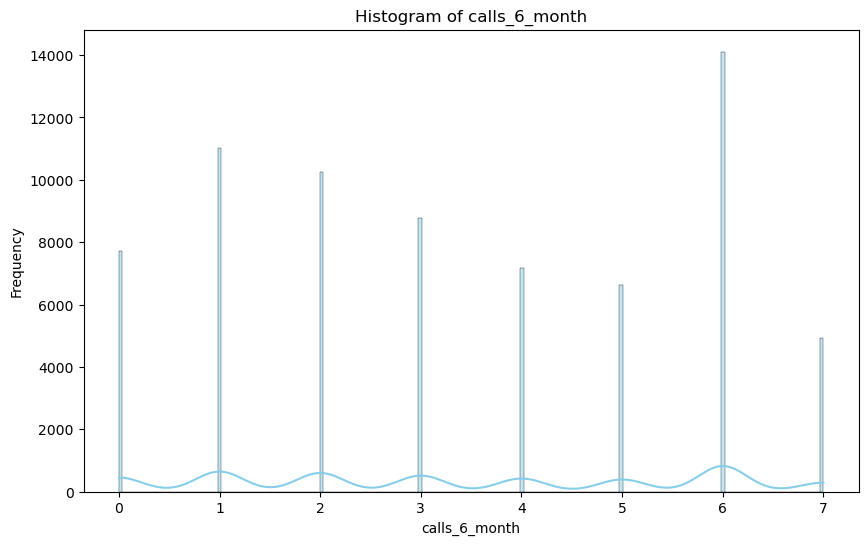

In [49]:
#2.3. Shape of Distribution Numerical  Continuous Variables

def plot_histogram(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=200, kde=True, color="skyblue")
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(df_demo, 'calls_6_month')

## logons_6_month

In [29]:
#logons_6_month. Numerical.
# 1.2. Central Tendency: Calculating the mean, median, and mode
def calculate_central_tendency(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, so take the first element

    # Displaying the results
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    
calculate_central_tendency(df_demo, 'logons_6_month')

Mean: 5.566627483748531
Median: 5.0
Mode: 9


In [32]:
# 2.2. Measures of Dispersion 
def calculate_measures_of_dispersion(df, column):
    variance = df[column].var()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Displaying the results
    print(f"Variance of {column}:", variance)
    print(f"Standard Deviation of {column}:", std_dev)
    print(f"Minimum {column}:", min_val)
    print(f"Maximum {column}:", max_val)
    print(f"1st Quartile (Q1) of {column}:", q1)
    print(f"3rd Quartile (Q3) of {column}:", q3)
    print(f"Interquartile Range (IQR) of {column}:", iqr)

# usage:
calculate_measures_of_dispersion(df_demo, 'logons_6_month')

Variance of logons_6_month: 5.536919343457412
Standard Deviation of logons_6_month: 2.353065945411945
Minimum logons_6_month: 1
Maximum logons_6_month: 9
1st Quartile (Q1) of logons_6_month: 4.0
3rd Quartile (Q3) of logons_6_month: 7.0
Interquartile Range (IQR) of logons_6_month: 3.0


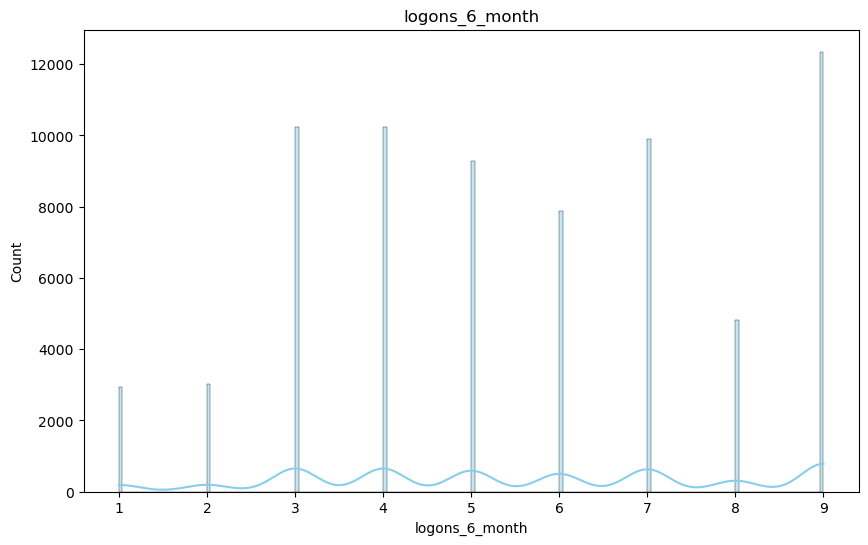

In [50]:
#2.3. Shape of Distribution Numerical  Continuous Variables

plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo[df_demo['logons_6_month']<147445]['logons_6_month'], bins=200, kde=True, color="skyblue")
plt.title('logons_6_month')
plt.show()